In [1]:
# pandas import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
app_record = pd.read_csv('application_record.csv')
credit_record = pd.read_csv('credit_record.csv')

In [3]:
# marge the two dataframes on the 'ID' column
df = pd.merge(app_record, credit_record, on='ID')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [4]:
df = df.dropna()
df.describe()
df['label'] = '0'
df.loc[df['STATUS'] == '1', 'label'] = 0
df.loc[df['STATUS'] == '2', 'label'] = 0
df.loc[df['STATUS'] == '3', 'label'] = 0
df.loc[df['STATUS'] == '4', 'label'] = 0
df.loc[df['STATUS'] == '5', 'label'] = 0
dfx = df[df['STATUS'] == 'X']
dfc = df[df['STATUS'] == 'C']
dfx['label'] = 1
dfc['label'] = 1
dfbad= df[df['label'] == 0]
accuser= pd.concat([dfx, dfc, dfbad])
accuser.head()

/tmp/ipykernel_69900/1376433726.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['label'] = 1
/tmp/ipykernel_69900/1376433726.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['label'] = 1


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,label
38,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,-7,X,1
41,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,-10,X,1
43,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,-12,X,1
45,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,-14,X,1
46,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,-15,X,1


In [5]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
accuser['STATUS'] = le.fit_transform(accuser['STATUS'])
accuser['STATUS'].value_counts()
enpo=["NAME_EDUCATION_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","OCCUPATION_TYPE"]
remove=["ID","CODE_GENDER","FLAG_MOBIL"]
for i in enpo:
    accuser[i] = le.fit_transform(accuser[i])
accuser = accuser.drop(remove, axis=1)
accuser.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,label
38,1,1,0,112500.0,4,4,1,1,-21474,-1134,0,0,0,16,2.0,-7,6,1
41,1,1,0,112500.0,4,4,1,1,-21474,-1134,0,0,0,16,2.0,-10,6,1
43,1,1,0,112500.0,4,4,1,1,-21474,-1134,0,0,0,16,2.0,-12,6,1
45,1,1,0,112500.0,4,4,1,1,-21474,-1134,0,0,0,16,2.0,-14,6,1
46,1,1,0,112500.0,4,4,1,1,-21474,-1134,0,0,0,16,2.0,-15,6,1


In [6]:
accuser = accuser.sample(frac=1).reset_index(drop=True)
accuser_bad = accuser[accuser['label'] == 0].head(500)
accuser_good = accuser[accuser['label'] == 1].head(500)
accuser_bad['label'] = le.fit_transform(accuser_bad['label'])
accuser = pd.concat([accuser_bad, accuser_good])

In [7]:
accuser['STATUS'].value_counts()

STATUS
0    368
5    355
6    145
4     79
1     32
2     16
3      5
Name: count, dtype: int64

In [8]:
accuser.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,label
1,0,1,1,202500.0,4,2,1,1,-10746,-1100,0,1,0,14,3.0,-12,4,0
57,1,1,0,247500.0,4,4,1,0,-11085,-2783,1,0,0,14,2.0,-37,0,0
75,1,1,1,157500.0,4,1,1,5,-10845,-521,0,0,1,6,3.0,-18,0,0
199,1,0,1,180000.0,0,4,1,2,-15934,-3328,0,0,0,1,3.0,-31,0,0
205,0,1,0,360000.0,2,4,1,1,-19070,-10490,0,0,0,0,2.0,-10,0,0


In [9]:
accuser.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 509
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FLAG_OWN_CAR         1000 non-null   int64  
 1   FLAG_OWN_REALTY      1000 non-null   int64  
 2   CNT_CHILDREN         1000 non-null   int64  
 3   AMT_INCOME_TOTAL     1000 non-null   float64
 4   NAME_INCOME_TYPE     1000 non-null   int64  
 5   NAME_EDUCATION_TYPE  1000 non-null   int64  
 6   NAME_FAMILY_STATUS   1000 non-null   int64  
 7   NAME_HOUSING_TYPE    1000 non-null   int64  
 8   DAYS_BIRTH           1000 non-null   int64  
 9   DAYS_EMPLOYED        1000 non-null   int64  
 10  FLAG_WORK_PHONE      1000 non-null   int64  
 11  FLAG_PHONE           1000 non-null   int64  
 12  FLAG_EMAIL           1000 non-null   int64  
 13  OCCUPATION_TYPE      1000 non-null   int64  
 14  CNT_FAM_MEMBERS      1000 non-null   float64
 15  MONTHS_BALANCE       1000 non-null   int64  

In [10]:
# print uniq value in accuser data
for i in accuser.columns:
    print(i)
    print(accuser[i].unique())

FLAG_OWN_CAR
[0 1]
FLAG_OWN_REALTY
[1 0]
CNT_CHILDREN
[1 0 3 2 4 5 7]
AMT_INCOME_TOTAL
[ 202500.   247500.   157500.   180000.   360000.    81000.   225000.
   90000.   337500.   450000.    85500.   135000.   112500.   292500.
  306000.   108000.   126000.   270000.   121500.   900000.   315000.
  103500.   261000.   139500.   130500.  1350000.   162000.   216000.
  144000.   190399.5  195750.    45000.   234000.    76500.   211500.
  612000.   324000.   283500.    67500.    72000.   171000.   495000.
  391500.   153000.   675000.   585000.   256500.   405000.   265500.
  148500.   540000.   117000.    99000.    27000.   238500.   459000.
  373500.   189000.    69750.  1125000.   297000.   387000.   175500.
  193500.   213750.   517500.   166500.   229500.   252000.   184500.
  207000.    54000.   119250.    94500.   427500.   274500.    62653.5
  310500.   116100.   129150.   328500. ]
NAME_INCOME_TYPE
[4 0 2 1 3]
NAME_EDUCATION_TYPE
[2 4 1 3]
NAME_FAMILY_STATUS
[1 3 0 2 4]
NAME_HOUSI

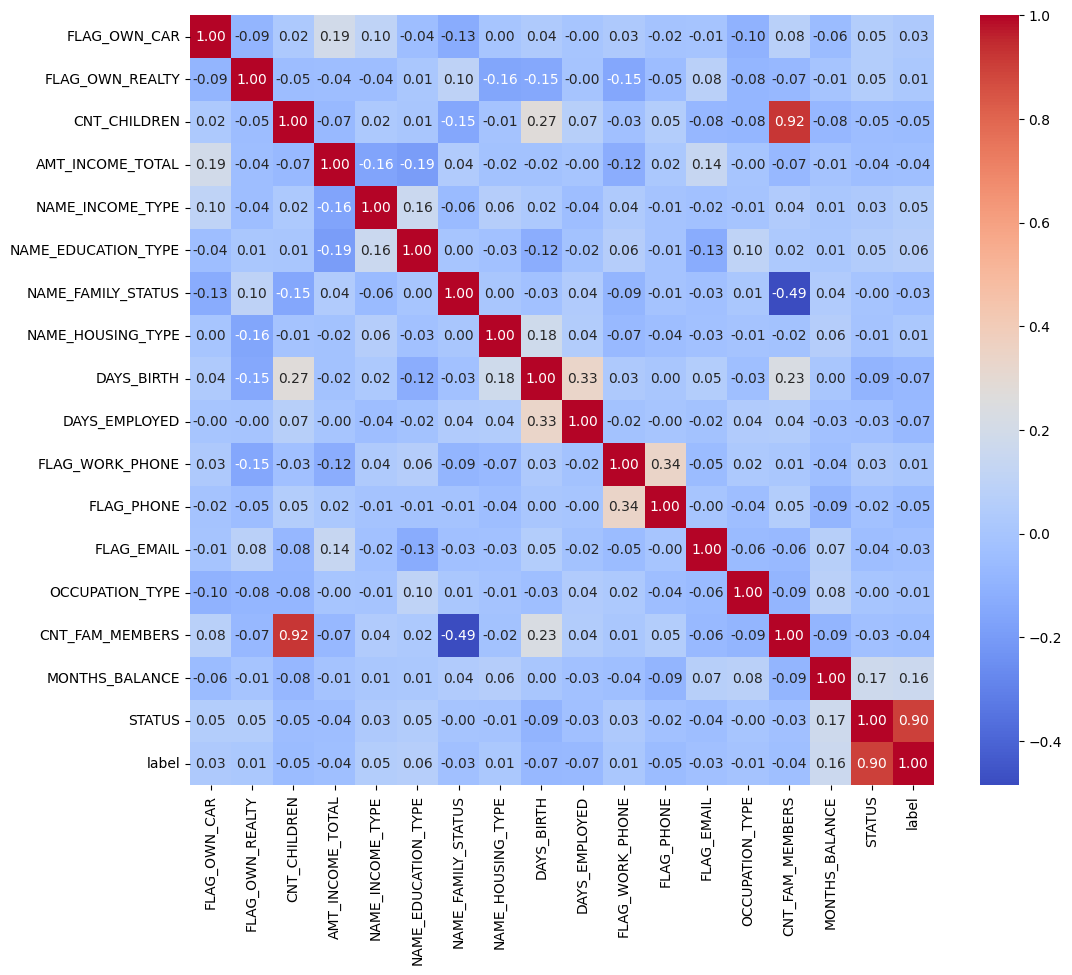

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the heatmap to see the correlation
plt.figure(figsize=(12, 10))
sns.heatmap(accuser.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


In [12]:
print(accuser.corr()['label'][(accuser.corr()['label'] > 0.01) | (accuser.corr()['label'] < -0.01)].sort_values(ascending=False))

label                  1.000000
STATUS                 0.899396
MONTHS_BALANCE         0.161727
NAME_EDUCATION_TYPE    0.063487
NAME_INCOME_TYPE       0.049448
FLAG_OWN_CAR           0.026223
FLAG_OWN_REALTY        0.014491
NAME_HOUSING_TYPE      0.014262
OCCUPATION_TYPE       -0.011196
FLAG_EMAIL            -0.028428
NAME_FAMILY_STATUS    -0.030651
AMT_INCOME_TOTAL      -0.035558
CNT_FAM_MEMBERS       -0.037393
FLAG_PHONE            -0.051041
CNT_CHILDREN          -0.053952
DAYS_EMPLOYED         -0.065613
DAYS_BIRTH            -0.070410
Name: label, dtype: float64


In [13]:
bestvar=[
    "label",
    "MONTHS_BALANCE",
    "NAME_INCOME_TYPE",
    "FLAG_OWN_REALTY",
    "CNT_FAM_MEMBERS",
]
accuser = accuser[bestvar]

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = accuser.drop('label', axis=1)
y = accuser['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
print(y_train)

1533     0
36       1
198      1
59       1
342      1
        ..
3843     0
9997     0
367      1
17025    0
3819     0
Name: label, Length: 800, dtype: object


In [16]:
for i in accuser.columns:
    accuser[i] = accuser[i].astype(float)
accuser.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 509
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   label             1000 non-null   float64
 1   MONTHS_BALANCE    1000 non-null   float64
 2   NAME_INCOME_TYPE  1000 non-null   float64
 3   FLAG_OWN_REALTY   1000 non-null   float64
 4   CNT_FAM_MEMBERS   1000 non-null   float64
dtypes: float64(5)
memory usage: 46.9 KB


In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = accuser.drop('label', axis=1)
y = accuser['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [18]:
# import the logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.53      0.57      0.55        96
         1.0       0.57      0.53      0.55       104

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.55      0.55      0.55       200



In [21]:
# print the classification report
print(classification_report(y_test, logreg.predict(X_test)))


              precision    recall  f1-score   support

         0.0       0.53      0.57      0.55        96
         1.0       0.57      0.53      0.55       104

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.55      0.55      0.55       200

